Train score:
0.8154737415420956
Test score:
0.8237246610358143


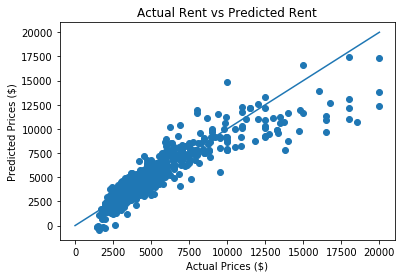

Model Coefficients:  [[  -97.24015671  1084.45543498     4.46420406   -16.37810562
     29.14162407   -94.02974713    -6.9986361     49.77730276
    187.73217395  -100.80571004     6.36022499   -91.67571599
    -46.29042827   -22.16499624   206.63255967 -1669.24470831
   1557.52272467  1015.56574621  -214.89353324 -1151.57436691
    740.17423125  -151.45437182   912.74425976   696.1867565
   1175.07847816 -1277.28280684 -1750.0299126    525.20811275
   -866.70458554     6.52894611  -643.48888792   137.45836773
   -125.85232755   -94.15619427   -61.48568423  -718.56054286
   1052.21979763 -1063.95546509  1672.59138937   225.21994412
    900.35619989   137.81219243   279.64215057 -2009.35851129
  -1463.94844414  2021.04848581]]


In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

streeteasy = pd.read_csv("https://raw.githubusercontent.com/sonnynomnom/Codecademy-Machine-Learning-Fundamentals/master/StreetEasy/manhattan.csv")

df = pd.DataFrame(streeteasy)

neighborhood = df["neighborhood"]
dummy_neighbors = pd.get_dummies(neighborhood)

# define the labels
x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor',
        'no_fee',  'building_age_yrs', 'has_roofdeck', 'has_washer_dryer',
        'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio',
        'has_gym']]
x = pd.concat([x, dummy_neighbors], axis=1)

# define the data
y = df[['rent']]

# train/test split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

# multiple linear regression model
lm = LinearRegression()
model = lm.fit(x_train, y_train)

# predict rental prices
y_predict= lm.predict(x_test)


# score the training and test models
print("Train score:")
print(lm.score(x_train, y_train))

print("Test score:")
print(lm.score(x_test, y_test))

# plot the relationship between actual and predicted prices
plt.scatter(y_test, y_predict)
plt.plot(range(20000), range(20000))

plt.xlabel("Actual Prices ($)")
plt.ylabel("Predicted Prices ($)")
plt.title("Actual Rent vs Predicted Rent")

plt.show()

# obtain the model coefficients
model_coefficients = model.coef_

print("Model Coefficients: ", model_coefficients)